# Get a model spectrum at a specified Teff
If you just want a model at some Teff and have some photometry in a filter, then this notebook shows how to get that spectrum at the desired normalisation.

In [1]:
import numpy as np
import sdf.model
import matplotlib.pyplot as plt

 Config
  found files: 
['/Users/grant/Library/CloudStorage/OneDrive-UniversityofWarwick/astro/projects/sdf/sdf/sdf/sdf.conf', '/Users/grant/.sdf.conf']


In [2]:
m = sdf.model.SpecModel.read_model('phoenix_sol')

In [3]:
m.parameters

array(['Teff', 'logg'], dtype='<U4')

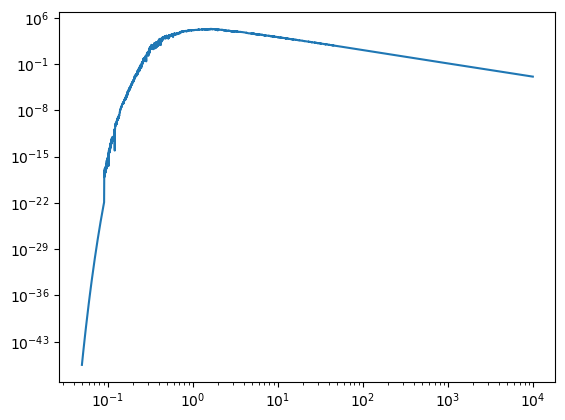

In [4]:
s = sdf.spectrum.ModelSpectrum(wavelength=m.wavelength, fnujy_sr=m.fnujy([3720., 4.5, 1.]))

plt.loglog(s.wavelength, s.fnujy_sr)

(0.1, 100)

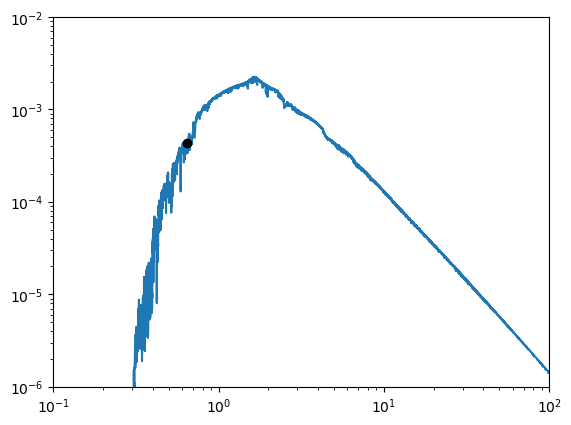

In [5]:
f = sdf.filter.Filter.get('GAIA.G')

norm = f.mag2flux(17.19) / s.synthphot(f)[0]  # synthphot returns flux and colour correction

plt.loglog(s.wavelength, s.fnujy_sr * norm)
plt.plot(f.mean_wavelength, f.mag2flux(17.19), 'ok')
plt.ylim(1e-6, 0.01)
plt.xlim(0.1, 100)

In [6]:
# save it
np.save(f'spectrum_3720K_17p19G.npy', np.vstack((s.wavelength, s.fnujy_sr * norm)))